In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Scikit-learn ofrece la función **sklearn.datasets.make_blobs** que permite la generación de clusters de datos con distribución gausiana e isotrópica.

Principales parametros a considerar:

1. n_samples = cantidad de datos a generar
2. n_features = variables a generar
3. centers = cluster i esimo
4. random_state = semilla aleatoria definida

In [2]:
points_xy,group_xy= make_blobs(n_samples=300,centers = 3,n_features=2,random_state=17)

In [3]:
df_xy = pd.DataFrame(points_xy,columns=['x','y'])
df_xy['group'] = group_xy

In [4]:
display(df_xy.head(n=10))

,x,y,group
0,5.022576,3.613391,2
1,4.685253,3.125859,2
2,-3.638642,-0.103976,0
3,-4.360350,-0.551313,0
4,6.465981,4.497995,2
5,-3.331498,1.167738,0
6,-4.291979,-9.186590,1
7,6.412996,3.070163,2
8,-4.056286,-0.200578,0
9,-2.501740,1.710597,0


In [5]:
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
 2   group   300 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 6.0 KB


In [6]:
df_xy.describe()

,x,y,group
count,300.000000,300.000000,300.000000
mean,-1.436969,-1.646411,1.000000
std,5.334264,5.218787,0.817861
min,-8.928775,-11.055225,0.000000
25%,-5.580402,-8.053573,0.000000
50%,-3.912592,0.563191,1.000000
75%,5.021518,2.578222,2.000000
max,8.409263,6.341387,2.000000


Text(0, 0.5, 'y')

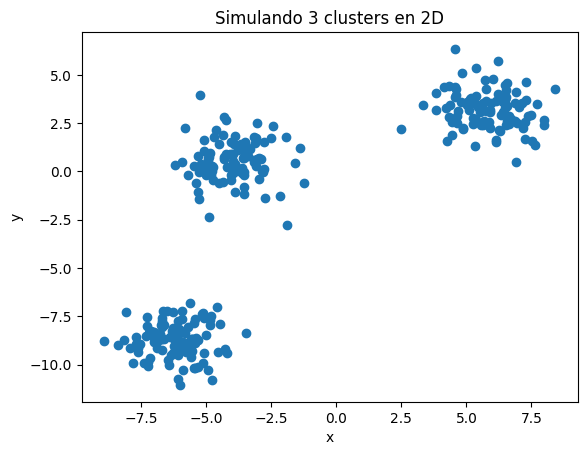

In [7]:
plt.scatter(df_xy['x'],df_xy['y'])
plt.title(label='Simulando 3 clusters en 2D')
plt.xlabel('x')
plt.ylabel('y')

Intuitivamente podemos ver que salen 3 grupos principales de cluster (justo como lo hace la función make_blobs), ahora usando la libreria seaborn, identifiquemos cada grupo de un color

<Axes: xlabel='x', ylabel='y'>

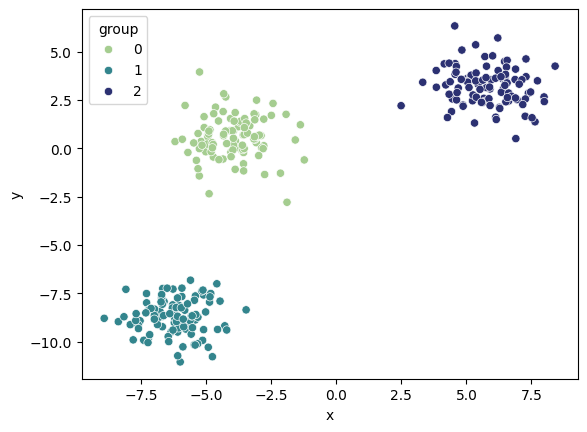

In [8]:
sns.scatterplot(data=df_xy,x='x',y='y',hue='group',palette="crest")

In [9]:
# Modelando con 3 clusters
x_y = np.column_stack((df_xy["x"],df_xy["y"]))
cluster_i = 3
print(f"KMeans con k = {cluster_i}, y los centroides son:")
cluster_i_result = KMeans(n_clusters = cluster_i).fit(x_y)#.cluster_centers_
all_centroids = {f"Cluster_3":cluster_i_result.cluster_centers_}
print(all_centroids["Cluster_3"]) # Centroids
df_xy['Cluster_' + str(cluster_i)] = cluster_i_result.labels_

KMeans con k = 3, y los centroides son:
[[-6.20004403 -8.71900955]
 [ 5.83117149  3.21192503]
 [-3.94203592  0.56785117]]


c:\Users\aleja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
display(df_xy.head(n=15))

,x,y,group,Cluster_3
0,5.022576,3.613391,2,1
1,4.685253,3.125859,2,1
2,-3.638642,-0.103976,0,2
3,-4.360350,-0.551313,0,2
4,6.465981,4.497995,2,1
5,-3.331498,1.167738,0,2
6,-4.291979,-9.186590,1,0
7,6.412996,3.070163,2,1
8,-4.056286,-0.200578,0,2
9,-2.501740,1.710597,0,2


Comparemos como se ven ambas agrupaciones visualmente

[Text(0.5, 1.0, 'Groups using ScikitLearn KMeans')]

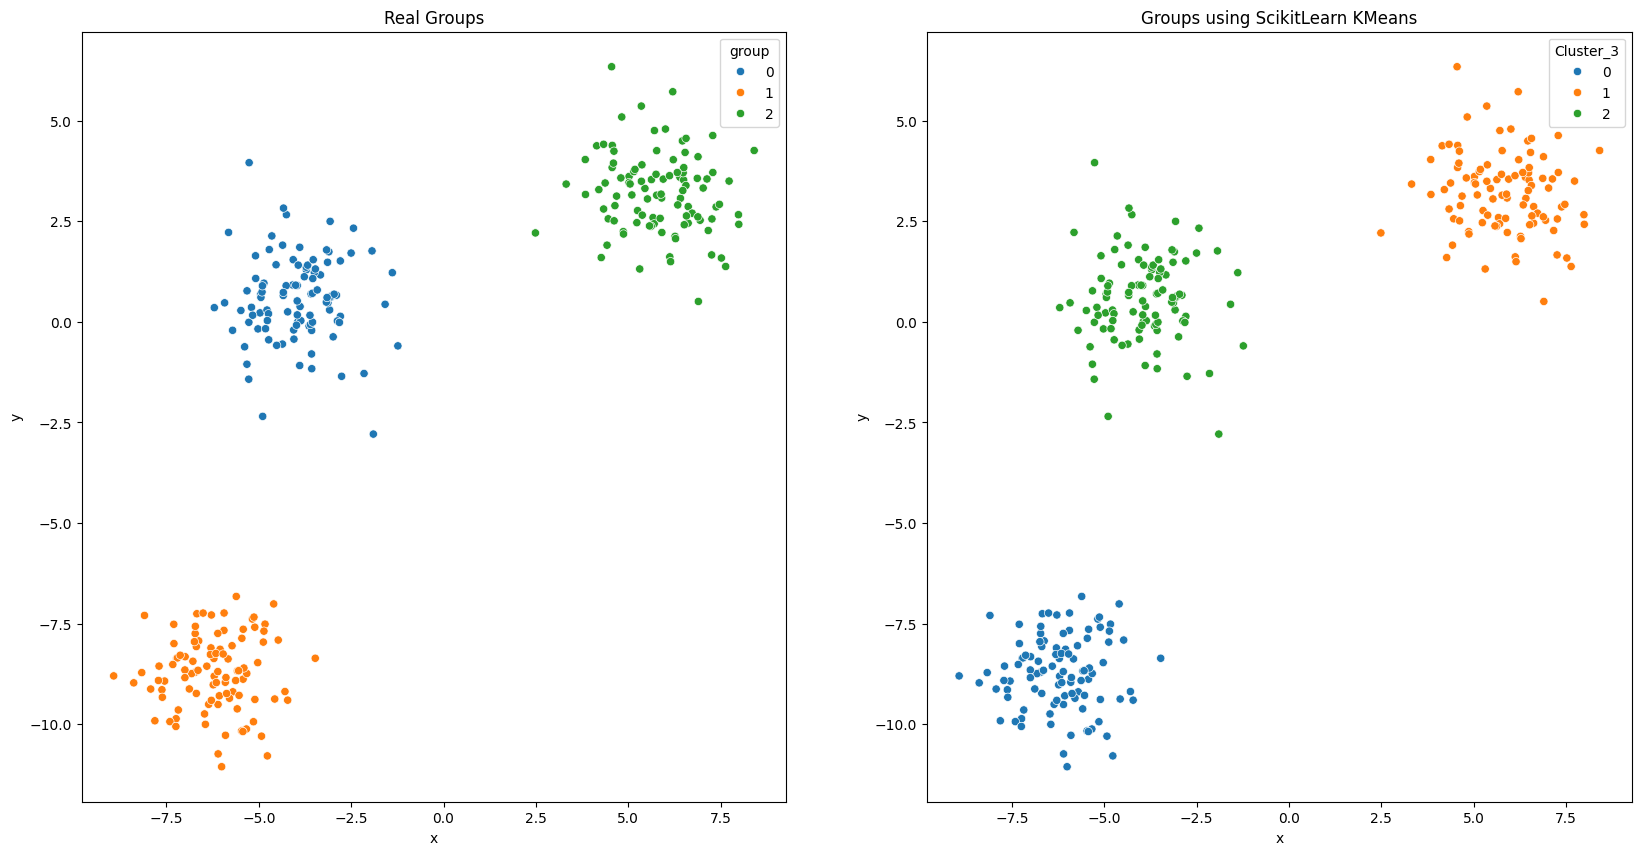

In [11]:
fig, axs = plt.subplots(ncols=2,figsize=(20, 10))


sns.scatterplot(data=df_xy,x='x',y='y',hue='group',palette="tab10",ax=axs[0]).set(title="Real Groups")
sns.scatterplot(data=df_xy,x='x',y='y',hue='Cluster_3',palette="tab10",ax=axs[1]).set(title="Groups using ScikitLearn KMeans")

Simulamos una muestra de datos bidemensional con 3 grupos, usando el algoritmo de kMeans si escogemos arbitrariamente, 2,4 y 5 grupos a calcular resulta en lo siguiente

In [12]:
for k_i in [2,4,5]:
    print(f"KMeans con k = {k_i}, y los centroides son:")
    cluster_i_result = KMeans(n_clusters = k_i).fit(x_y)#.cluster_centers_
    all_centroids[f"Cluster_{k_i}"] = cluster_i_result.cluster_centers_
    print(all_centroids[f"Cluster_{k_i}"]) # Centroids
    df_xy[f"Cluster_{k_i}"] = cluster_i_result.labels_

KMeans con k = 2, y los centroides son:
[[-5.07103997 -4.07557919]
 [ 5.83117149  3.21192503]]
KMeans con k = 4, y los centroides son:
[[-3.94203592  0.56785117]
 [ 6.61350477  2.94016417]
 [-6.20004403 -8.71900955]
 [ 4.83547458  3.5578025 ]]
KMeans con k = 5, y los centroides son:
[[ 6.61350477  2.94016417]
 [-4.41792161 -0.12947706]
 [-6.20004403 -8.71900955]
 [-3.46615023  1.26517941]
 [ 4.83547458  3.5578025 ]]


c:\Users\aleja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aleja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aleja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
display(df_xy.head(n=15))

,x,y,group,Cluster_3,Cluster_2,Cluster_4,Cluster_5
0,5.022576,3.613391,2,1,1,3,4
1,4.685253,3.125859,2,1,1,3,4
2,-3.638642,-0.103976,0,2,0,0,1
3,-4.360350,-0.551313,0,2,0,0,1
4,6.465981,4.497995,2,1,1,1,0
5,-3.331498,1.167738,0,2,0,0,3
6,-4.291979,-9.186590,1,0,0,2,2
7,6.412996,3.070163,2,1,1,1,0
8,-4.056286,-0.200578,0,2,0,0,1
9,-2.501740,1.710597,0,2,0,0,3


In [14]:
all_centroids

{'Cluster_3': array([[-6.20004403, -8.71900955],
        [ 5.83117149,  3.21192503],
        [-3.94203592,  0.56785117]]),
 'Cluster_2': array([[-5.07103997, -4.07557919],
        [ 5.83117149,  3.21192503]]),
 'Cluster_4': array([[-3.94203592,  0.56785117],
        [ 6.61350477,  2.94016417],
        [-6.20004403, -8.71900955],
        [ 4.83547458,  3.5578025 ]]),
 'Cluster_5': array([[ 6.61350477,  2.94016417],
        [-4.41792161, -0.12947706],
        [-6.20004403, -8.71900955],
        [-3.46615023,  1.26517941],
        [ 4.83547458,  3.5578025 ]])}

<Axes: title={'center': 'k=5'}, xlabel='x', ylabel='y'>

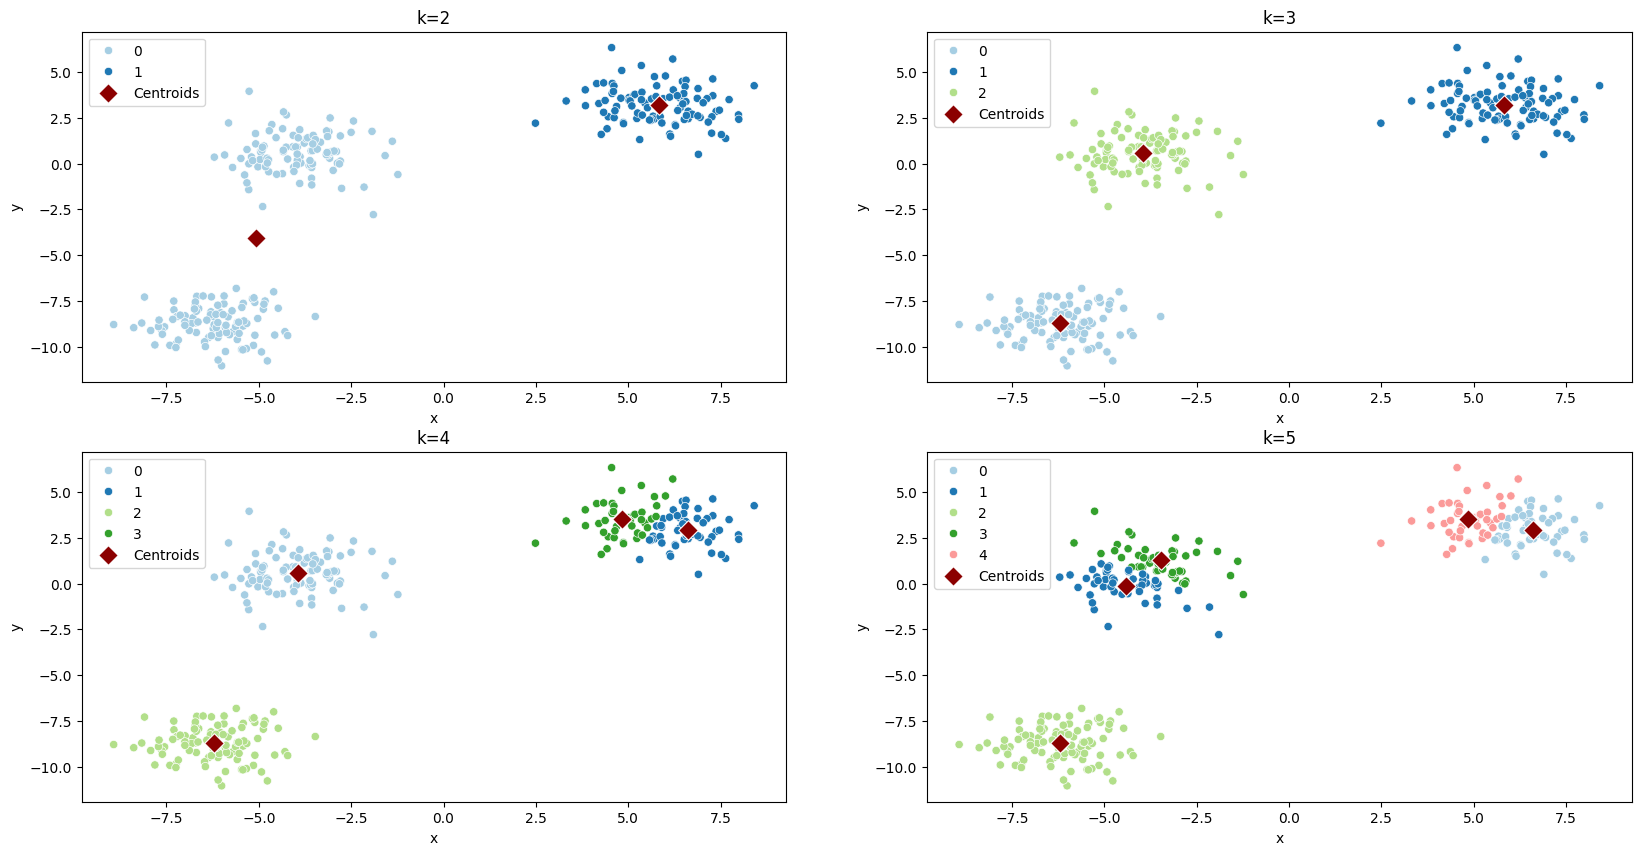

In [15]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(20, 10))

sns.scatterplot(data=df_xy, x="x", y="y", hue="Cluster_2", ax=axs[0,0], palette="Paired").set(title="k=2")
sns.scatterplot(x=all_centroids["Cluster_2"][:,0], y=all_centroids["Cluster_2"][:,1], ax=axs[0,0], marker='D', color="darkred", s=100, label='Centroids')
sns.scatterplot(data=df_xy, x="x", y="y", hue="Cluster_3", ax=axs[0,1], palette="Paired").set(title="k=3")
sns.scatterplot(x=all_centroids["Cluster_3"][:,0], y=all_centroids["Cluster_3"][:,1], ax=axs[0,1], marker='D', color="darkred", s=100, label='Centroids')
sns.scatterplot(data=df_xy, x="x", y="y", hue="Cluster_4", ax=axs[1,0], palette="Paired").set(title="k=4")
sns.scatterplot(x=all_centroids["Cluster_4"][:,0], y=all_centroids["Cluster_4"][:,1], ax=axs[1,0], marker='D', color="darkred", s=100, label='Centroids')
sns.scatterplot(data=df_xy, x="x", y="y", hue="Cluster_5", ax=axs[1,1], palette="Paired").set(title="k=5")
sns.scatterplot(x=all_centroids["Cluster_5"][:,0], y=all_centroids["Cluster_5"][:,1], ax=axs[1,1], marker='D', color="darkred", s=100, label='Centroids')

Podemos ver que la agrupación es algo similar a la clasificación, en el sentido de que cada elemento se una etiqueta. Sin embargo, no existe una verdad fundamental y, en consecuencia, las etiquetas mismas no tienen significado a priori.